In [ ]:
import numpy as np

#**Задание 1:**
Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу


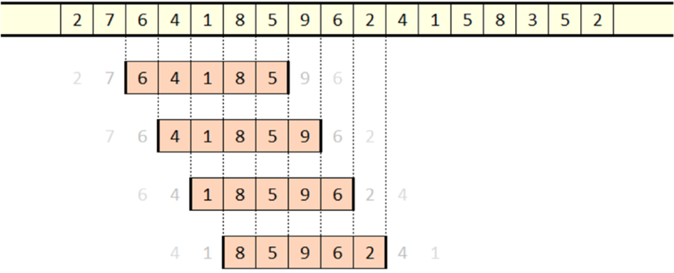

Аргументы функции:


*   x_array - Массив
*   w - Размер окна
*   step - Размер шага



In [ ]:
def sliding_window(x_array, w, step = 1):
    # Рассчитываем количество окон
    num_windows = (len(x_array) - w) // step + 1

    # Создаем пустую матрицу для хранения результатов
    A_matrix = np.empty((num_windows, w), dtype=x_array.dtype)

    # Заполняем матрицу скользящего среднего
    for i in range(num_windows):
        start = i * step
        end = start + w
        A_matrix[i] = x_array[start:end]

    return A_matrix

In [ ]:
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


#Задание 2:
В задании предлагается  ответить на несколько вопросов по данным репозитория UCI Adult (ссылка https://archive.ics.uci.edu/dataset/2/adult) (качать данные не надо – они уже есть в репозитории) и ответить на следующие вопросы:


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(X)
df["Income"] = y
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##1.	сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [ ]:
df["sex"].value_counts()

,count
sex,
Male,32650
Female,16192


##2.	каков средний возраст (признак age) женщин?

In [ ]:
df[df['sex'] == 'Female']["age"].mean()

36.92798913043478

##3.	какова доля граждан Германии (признак native-country)?

In [ ]:
len(df[df['native-country'] == "Germany"])/len(df)

0.00421768150362393

##4.	Постройте гистограмму распределения (bar plot) образования людей (признак education).

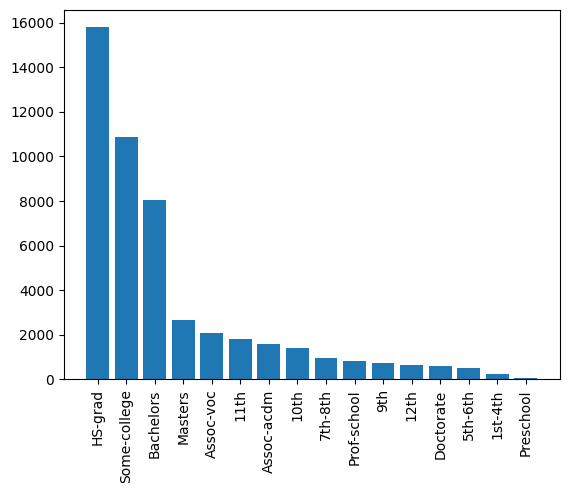

In [ ]:
from matplotlib import pyplot as plt

education_counts = df['education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xticks(rotation=90)
plt.show()


##5.	каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает менее 50K в год?

In [ ]:
print("Среднее значение возраста:")
df[df['Income'] == "<=50K"]['age'].mean()

Среднее значение возраста:


36.78373786407767

In [ ]:
print("Среднее квадратичное отклонение возраста:")
df[df['Income'] == "<=50K"]['age'].std()

Среднее квадратичное отклонение возраста:


14.02008849082488

##6.	правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

**Ответ: нет, не правда**

In [ ]:
df[df['Income'] == ">50K"]["education"].value_counts()

,count
education,
Bachelors,2221
HS-grad,1675
Some-college,1387
Masters,959
Prof-school,423
Assoc-voc,361
Doctorate,306
Assoc-acdm,265
10th,62


##7.	выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Каков максимальный возраст мужчин расы Amer-Indian-Eskimo?

In [ ]:
age_stats = df.groupby(['race', 'sex'])['age'].describe()

print(age_stats)

max_age = age_stats.loc[('Amer-Indian-Eskimo', 'Male'), 'max']
print(f"Максимальный возраст мужчин расы Amer-Indian-Eskimo: {max_age}")


                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    185.0  36.237838  12.840056  17.0  26.0  35.0   
                   Male      285.0  36.989474  11.703943  17.0  29.0  35.0   
Asian-Pac-Islander Female    517.0  35.657640  12.637799  17.0  25.0  34.0   
                   Male     1002.0  38.994012  12.824878  18.0  29.0  37.0   
Black              Female   2308.0  37.905979  12.736001  17.0  28.0  36.0   
                   Male     2377.0  37.922592  13.036981  17.0  28.0  36.0   
Other              Female    155.0  31.212903  11.233061  17.0  23.0  29.0   
                   Male      251.0  35.167331  11.808297  17.0  26.0  32.0   
White              Female  13027.0  36.882935  14.454178  17.0  25.0  35.0   
                   Male    28735.0  39.704507  13.475250  17.0  29.0  38.0   

                            75%   max  
race               sex 

##8.	среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми

In [ ]:
df['marital_status_group'] = df['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Single')

high_income_men = df[(df['sex'] == 'Male') & (df['Income'] == '>50K')]

married_ratio = high_income_men['marital_status_group'].value_counts(normalize=True)['Married']
single_ratio = high_income_men['marital_status_group'].value_counts(normalize=True)['Single']

print(f"Доля зарабатывающих >50K среди женатых мужчин: {married_ratio:.2%}")
print(f"Доля зарабатывающих >50K среди холостых мужчин: {single_ratio:.2%}")


Доля зарабатывающих >50K среди женатых мужчин: 89.54%
Доля зарабатывающих >50K среди холостых мужчин: 10.46%


##9.	Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [ ]:
max_hours = df['hours-per-week'].max()

num_people_max_hours = df[df['hours-per-week'] == max_hours].shape[0]
num_high_income_max_hours = df[(df['hours-per-week'] == max_hours) & (df['Income'] == '>50K')].shape[0]

percentage_high_income = (num_high_income_max_hours / num_people_max_hours) * 100

print(f"Максимальное количество часов работы в неделю: {max_hours}")
print(f"Количество людей, работающих {max_hours} часов в неделю: {num_people_max_hours}")
print(f"Количество людей, зарабатывающих >50K среди них: {num_high_income_max_hours}")
print(f"Процент зарабатывающих >50K среди работающих {max_hours} часов: {percentage_high_income:.2f}%")


Максимальное количество часов работы в неделю: 99
Количество людей, работающих 99 часов в неделю: 137
Количество людей, зарабатывающих >50K среди них: 25
Процент зарабатывающих >50K среди работающих 99 часов: 18.25%


##10.	посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country)

In [ ]:
low_income = df[df['Income'] == '<=50K']
high_income = df[df['Income'] == '>50K']

avg_hours_low_income = low_income.groupby('native-country')['hours-per-week'].mean()
avg_hours_high_income = high_income.groupby('native-country')['hours-per-week'].mean()

print("Среднее время работы зарабатывающих мало (<=50K) для каждой страны:")
print(avg_hours_low_income)

print("\nСреднее время работы зарабатывающих много (>50K) для каждой страны:")
print(avg_hours_high_income)


Среднее время работы зарабатывающих мало (<=50K) для каждой страны:
native-country
?                             40.164760
Cambodia                      41.416667
Canada                        37.914634
China                         37.381818
Columbia                      38.684211
Cuba                          37.985714
Dominican-Republic            42.338235
Ecuador                       38.041667
El-Salvador                   36.030928
England                       40.483333
France                        41.058824
Germany                       39.139785
Greece                        41.809524
Guatemala                     39.360656
Haiti                         36.325000
Holand-Netherlands            40.000000
Honduras                      34.333333
Hong                          39.142857
Hungary                       31.300000
India                         38.233333
Iran                          41.440000
Ireland                       40.947368
Italy                         39.6250

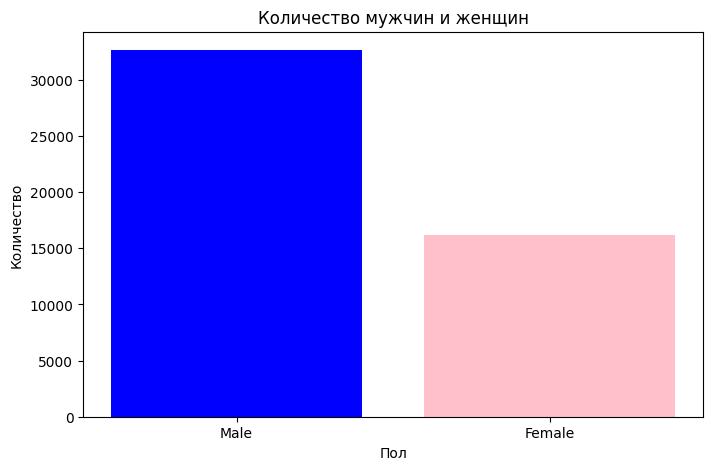

In [ ]:
import matplotlib.pyplot as plt

sex_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])
plt.title('Количество мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()


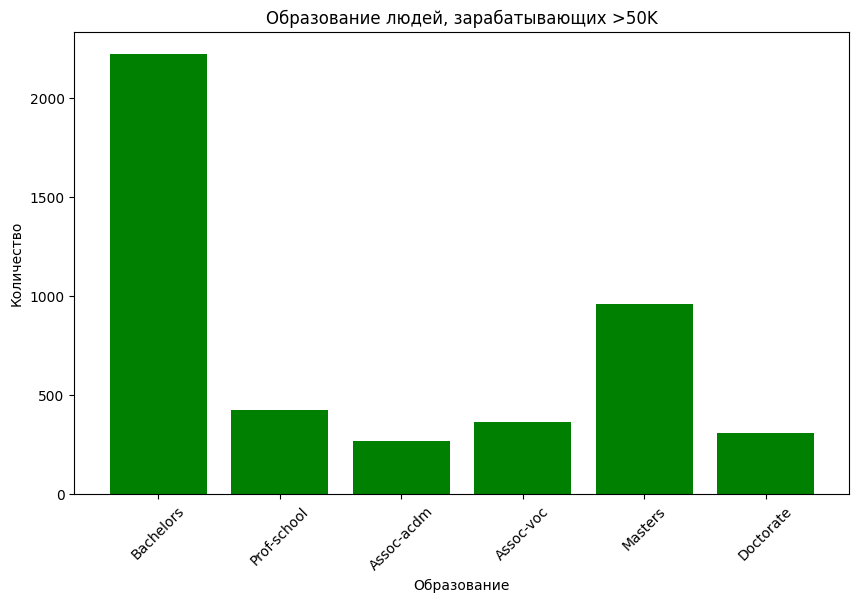

In [ ]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

education_counts_high_income = df[df['Income'] == '>50K']['education'].value_counts()

education_counts_high_income = education_counts_high_income[higher_education].fillna(0)

plt.figure(figsize=(10, 6))
plt.bar(education_counts_high_income.index, education_counts_high_income.values, color='green')
plt.title('Образование людей, зарабатывающих >50K')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()


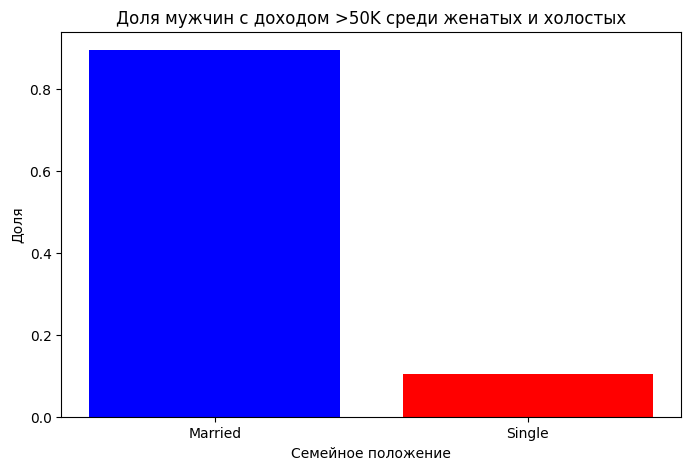

In [ ]:
labels = ['Married', 'Single']
ratios = [married_ratio, single_ratio]

plt.figure(figsize=(8, 5))
plt.bar(labels, ratios, color=['blue', 'red'])
plt.title('Доля мужчин с доходом >50K среди женатых и холостых')
plt.xlabel('Семейное положение')
plt.ylabel('Доля')
plt.show()


<Figure size 1200x800 with 0 Axes>

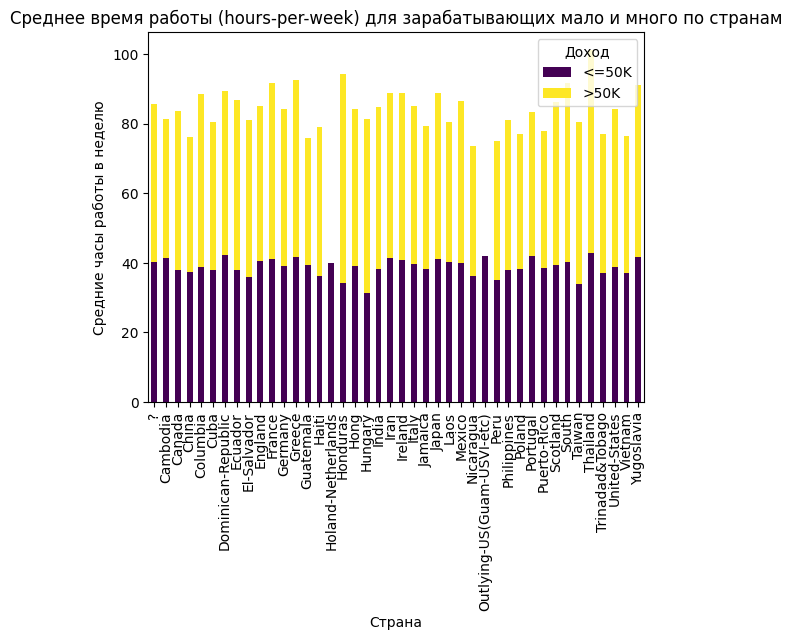

In [ ]:
avg_hours = pd.DataFrame({
    '<=50K': avg_hours_low_income,
    '>50K': avg_hours_high_income
}).fillna(0)

plt.figure(figsize=(12, 8))
avg_hours.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Среднее время работы (hours-per-week) для зарабатывающих мало и много по странам')
plt.xlabel('Страна')
plt.ylabel('Средние часы работы в неделю')
plt.xticks(rotation=90)
plt.legend(title='Доход')
plt.show()


#**Задание 3:**
На основе выбранного вами датасета провести его анализ по минимум 10 признакам. Датасет можно выбрать с данного сайта https://www.kaggle.com


In [ ]:
data = pd.read_csv('train.csv')

print(data.info())

print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##1. Анализ пропущенных значений


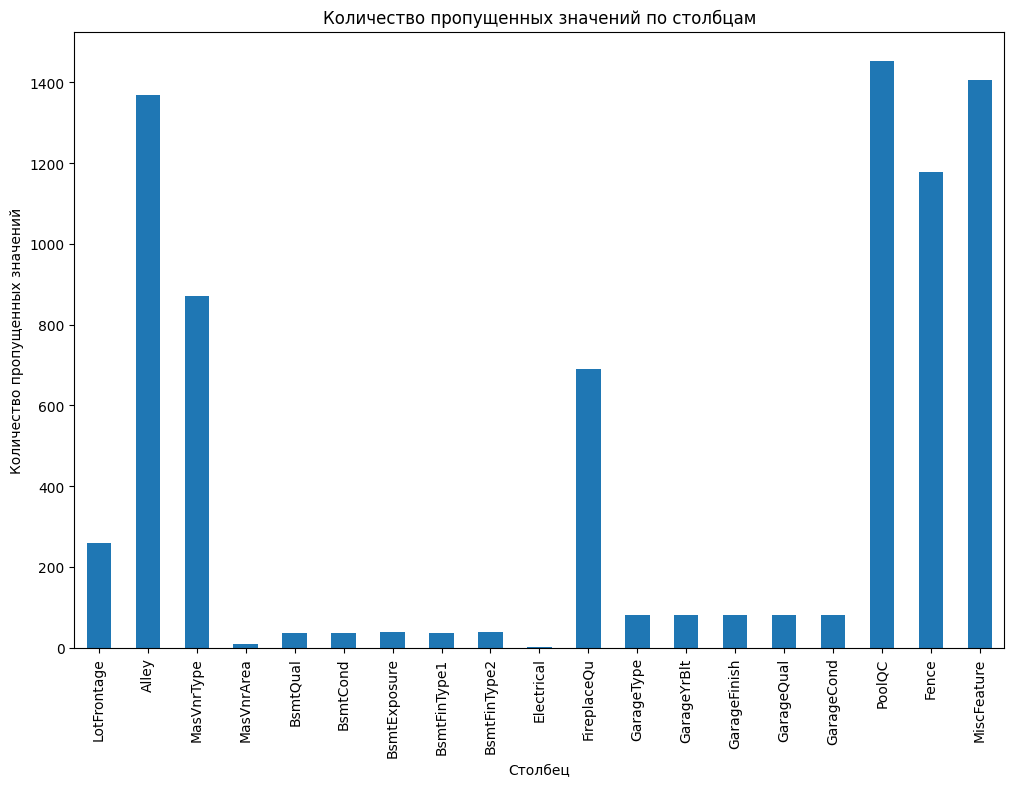

In [ ]:
missing_values = data.isnull().sum()
plt.figure(figsize=(12, 8))
missing_values[missing_values > 0].plot(kind='bar')
plt.title('Количество пропущенных значений по столбцам')
plt.xlabel('Столбец')
plt.ylabel('Количество пропущенных значений')
plt.xticks(rotation=90)
plt.show()

##2. Распределение цены

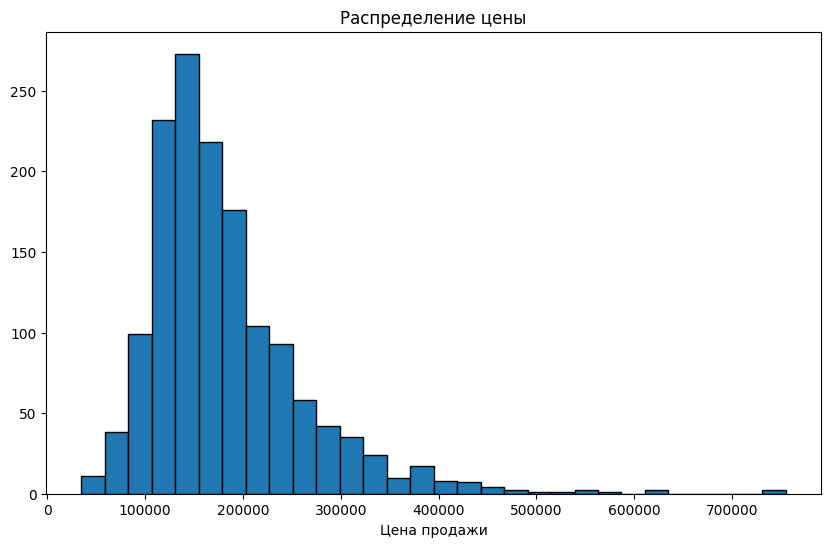

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['SalePrice'], bins=30, edgecolor='k')
plt.title('Распределение цены')
plt.xlabel('Цена продажи')
plt.show()


##3. Распределение по районам



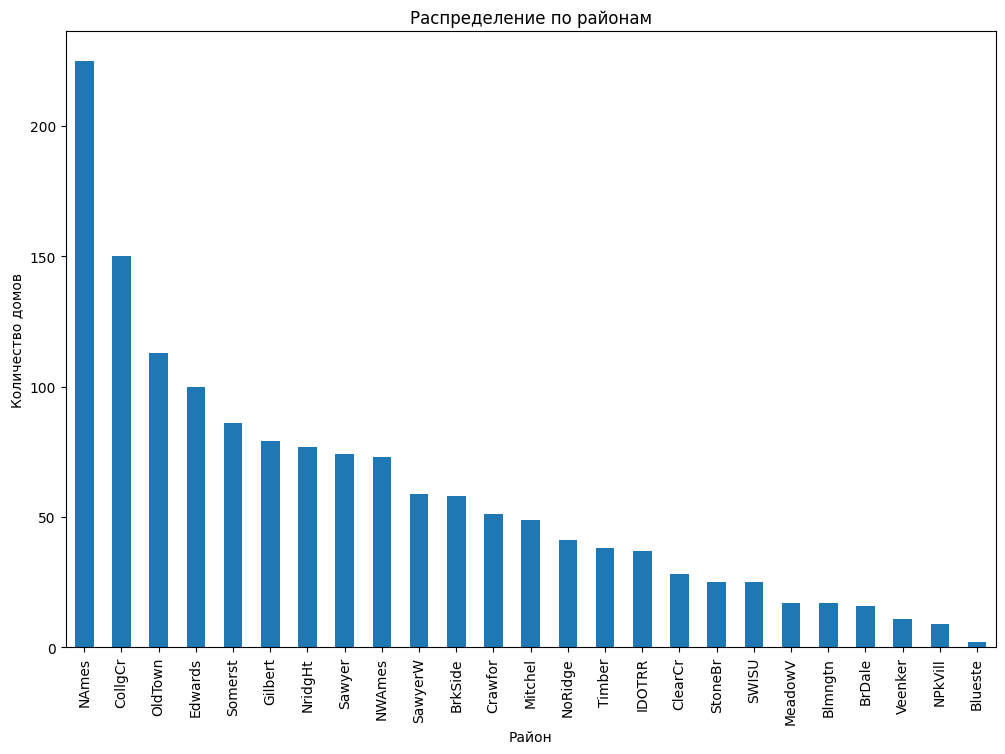

In [ ]:
neighborhood_counts = data['Neighborhood'].value_counts()
plt.figure(figsize=(12, 8))
neighborhood_counts.plot(kind='bar')
plt.title('Распределение по районам')
plt.xlabel('Район')
plt.ylabel('Количество домов')
plt.xticks(rotation=90)
plt.show()

##4. Распределение площади участка

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


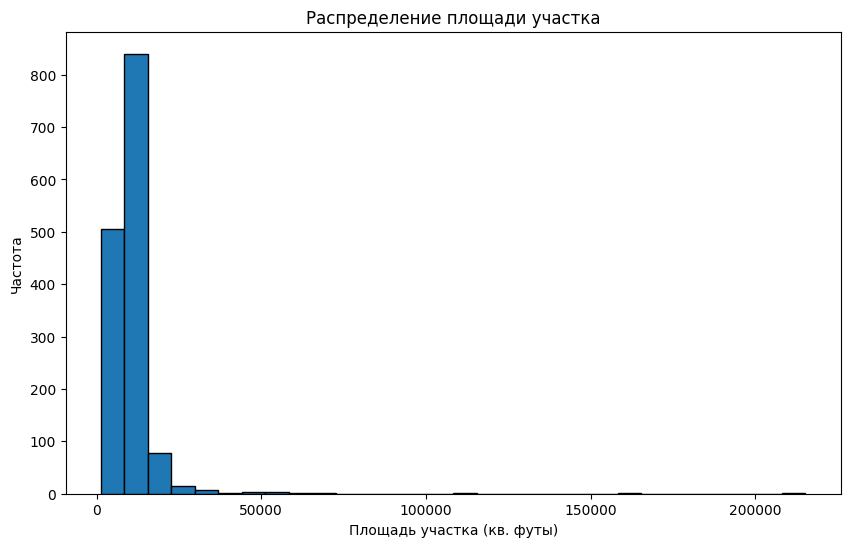

In [ ]:
print(data['LotArea'].describe())
plt.figure(figsize=(10, 6))
plt.hist(data['LotArea'], bins=30, edgecolor='k')
plt.title('Распределение площади участка')
plt.xlabel('Площадь участка (кв. футы)')
plt.ylabel('Частота')
plt.show()


##5. Распределение года постройки дома

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


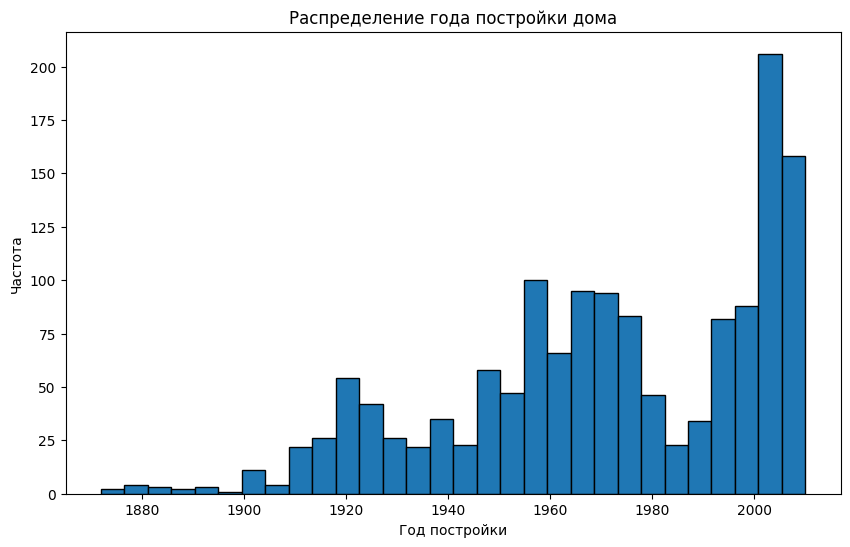

In [ ]:
print(data['YearBuilt'].describe())
plt.figure(figsize=(10, 6))
plt.hist(data['YearBuilt'], bins=30, edgecolor='k')
plt.title('Распределение года постройки дома')
plt.xlabel('Год постройки')
plt.ylabel('Частота')
plt.show()


##6. Зависимость площади от цены

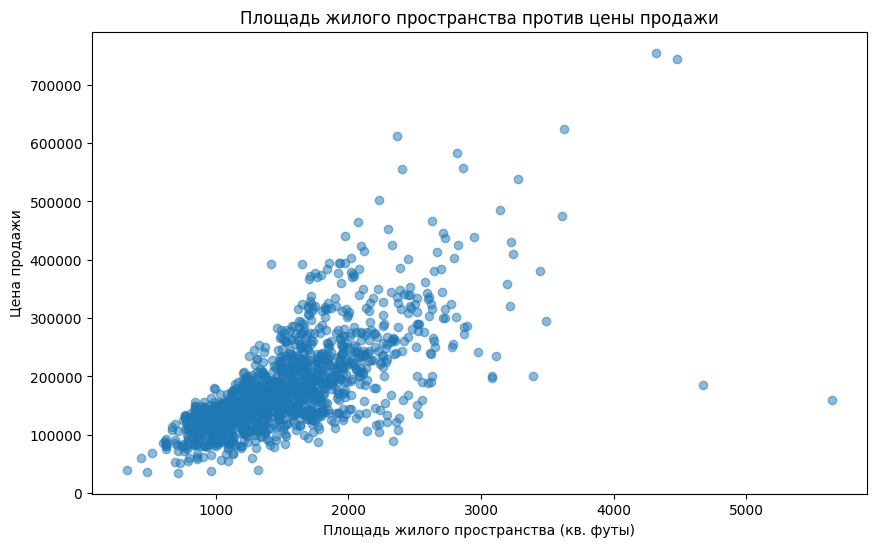

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5)
plt.title('Площадь жилого пространства против цены продажи')
plt.xlabel('Площадь жилого пространства (кв. футы)')
plt.ylabel('Цена продажи')
plt.show()

##7. Средняя цена продажи в зависимости общего состояния




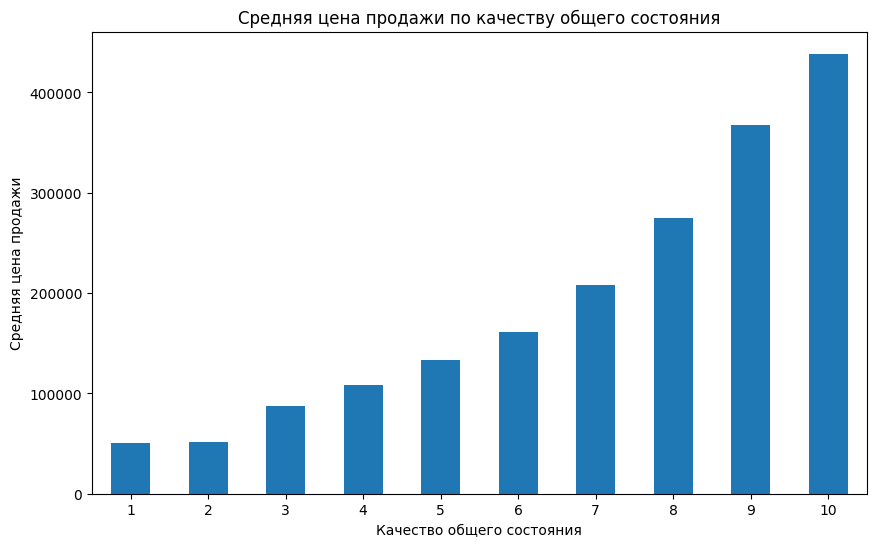

In [ ]:
quality_price = data.groupby('OverallQual')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
quality_price.plot(kind='bar')
plt.title('Средняя цена продажи по качеству общего состояния')
plt.xlabel('Качество общего состояния')
plt.ylabel('Средняя цена продажи')
plt.xticks(rotation=0)
plt.show()

##8. Зависимость возраста дома от цены его продажи

count    1460.000000
mean       52.732192
std        30.202904
min        14.000000
25%        24.000000
50%        51.000000
75%        70.000000
max       152.000000
Name: HouseAge, dtype: float64


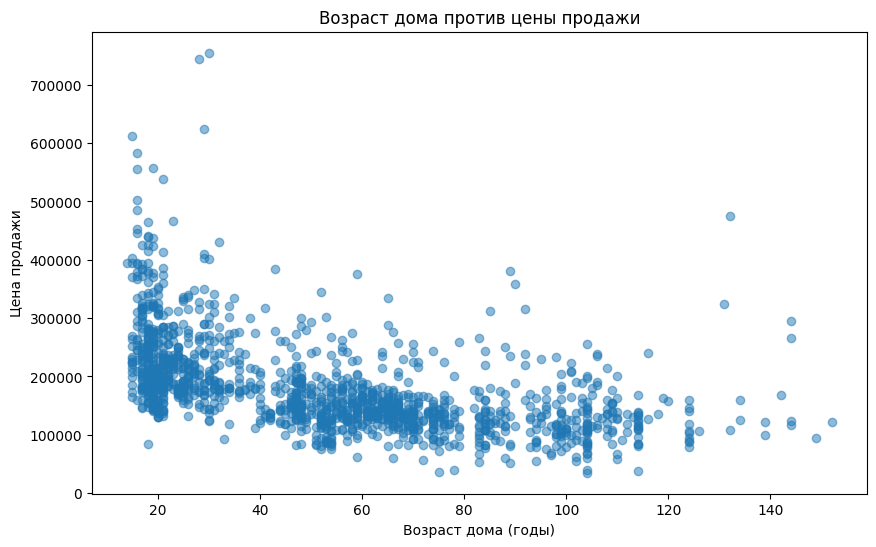

In [ ]:
data['HouseAge'] = 2024 - data['YearBuilt']
print(data['HouseAge'].describe())
plt.figure(figsize=(10, 6))
plt.scatter(data['HouseAge'], data['SalePrice'], alpha=0.5)
plt.title('Возраст дома против цены продажи')
plt.xlabel('Возраст дома (годы)')
plt.ylabel('Цена продажи')
plt.show()

##9. Распределение числа комнат

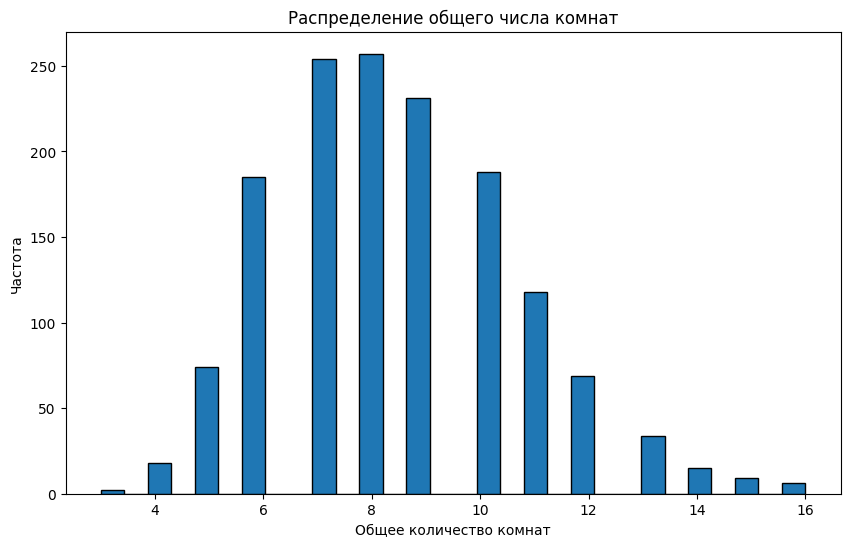

In [ ]:
data['TotalRooms'] = data['TotRmsAbvGrd'] + data['FullBath'] + data['HalfBath']
plt.figure(figsize=(10, 6))
plt.hist(data['TotalRooms'], bins=30, edgecolor='k')
plt.title('Распределение общего числа комнат')
plt.xlabel('Общее количество комнат')
plt.ylabel('Частота')
plt.show()

## 10. Распределение площади подвала

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


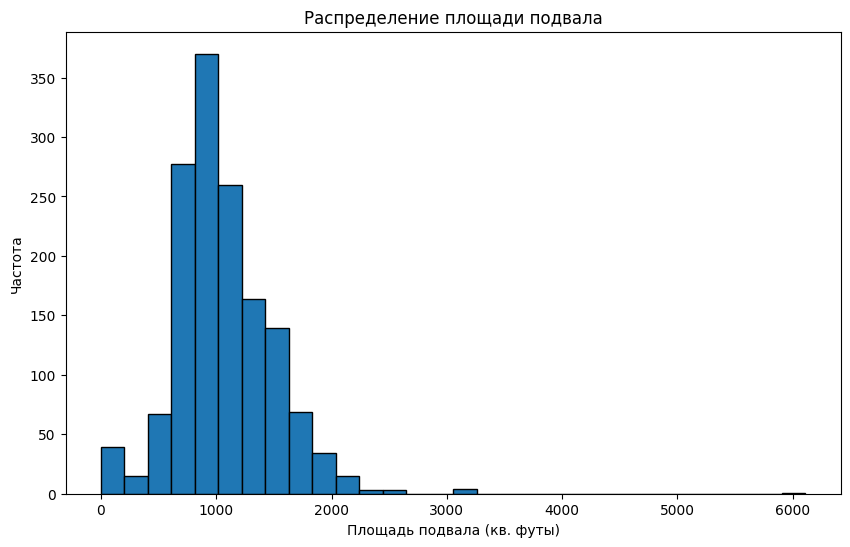

In [ ]:
print(data['TotalBsmtSF'].describe())
plt.figure(figsize=(10, 6))
plt.hist(data['TotalBsmtSF'], bins=30, edgecolor='k')
plt.title('Распределение площади подвала')
plt.xlabel('Площадь подвала (кв. футы)')
plt.ylabel('Частота')
plt.show()
